### Import Libraries

In [1]:
import keras
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPool2D,Flatten, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,img_to_array
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)

In [3]:
train_data_path=train_data.flow_from_directory(directory=r'cnn_train',target_size=(48,48))
test_data_path=test_data.flow_from_directory(directory='cnn_test',target_size=(48,48))

Found 28 images belonging to 3 classes.
Found 7 images belonging to 3 classes.


In [4]:
train_data_path.class_indices

{'raj': 0, 'srk': 1, 'vijay': 2}

In [5]:
test_data_path.class_indices

{'raj': 0, 'srk': 1, 'vijay': 2}

### Model Building

### Step 1 : Build Architecture

In [6]:
model=Sequential()
model.add(Conv2D(input_shape=(48,48,3),filters=4,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=2,padding='same'))
model.add(Conv2D(filters=8,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 4)         112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 40)                4

### Step 2 : Compile the Architecture

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='categorical_accuracy')

### Model Training

In [8]:
model.fit(x=train_data_path,batch_size=32,epochs=5,validation_data=test_data_path)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 1.2009 - categorical_accuracy: 0.3214 - val_loss: 1.0951 - val_categorical_accuracy: 0.2857
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 1.0746 - categorical_accuracy: 0.4643 - val_loss: 1.0922 - val_categorical_accuracy: 0.2857
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 1.0041 - categorical_accuracy: 0.5000 - val_loss: 1.1057 - val_categorical_accuracy: 0.2857
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 0.9668 - categorical_accuracy: 0.5000 - val_loss: 1.1126 - val_categorical_accuracy: 0.2857
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 0.9388 - categorical_accuracy: 0.5000 - val_loss: 1.1021 - val_categorical_accuracy: 0.2857


### Model Deployment

In [9]:
model.save('multiclassclassifier.h5')

### Model Prediction

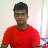

In [10]:
test_image=load_img(path=r'C:\Users\836916.INDIA\Documents\cnn_test\raj\PSX_20191117_234011.jpg',target_size=(48,48,3))
test_image

In [11]:
test_image_array=img_to_array(test_image)

In [12]:
test_image_array=np.expand_dims(a=test_image_array,axis=0)

In [13]:
#load model
model=load_model('multiclassclassifier.h5')
result=model.predict(test_image_array)
result

1/1 [==============================] - 0s 74ms/step


array([[1., 0., 0.]], dtype=float32)

In [14]:
if result[0][0]==1:
    prediction='raj'
    print(prediction)
elif result[0][1]==1:
    prediction='srk'
    print(prediction)
else:
    prediction='vijay'
    print(prediction)

raj


### End !!!